In [71]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex. tools import input_factory


nr of spikes: 18
spikes times: [ 0.5211   0.54185  0.56855  0.59695  0.6254   0.6539   0.6824   0.7109
  0.7394   0.7679   0.7964   0.8249   0.85335  0.8819   0.91035  0.93885
  0.96735  0.99585] s


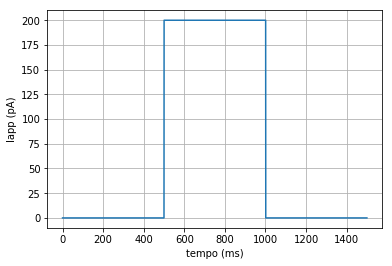

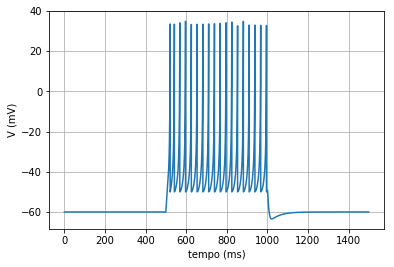

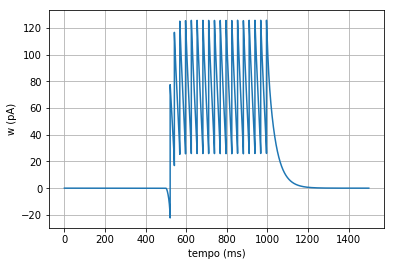

In [72]:
"""
Implements the dynamics of the exponential Integrate-and-fire model

Args:
    tau (Quantity): Membrane time constant
    R (Quantity): Membrane resistance
    v_rest (Quantity): Resting potential
    v_reset (Quantity): Reset value (vm after spike)
    v_rheobase (Quantity): Rheobase threshold
    v_spike (Quantity) : voltage threshold for the spike condition
    delta_T (Quantity): Sharpness of the exponential term
    I_stim (TimedArray): Input current
    simulation_time (Quantity): Duration for which the model is simulated
"""
v_rest= -60*b2.mV #EL
v_reset= -50*b2.mV #Vreset
conductance_L = 10*b2.nsiemens #GL
membrane_capacitance = 100*b2.pF #CM
firing_threshold = -40* b2.mV #Vth
deltaVth = 2*b2.mV

a = 0.03/(b2.ms)
b = -2*(b2.pA/b2.mV)
k = 0.7*b2.pA/(b2.mV**2)
d = 100*b2.pA 

tau_w = 200*b2.ms
v_max = 35*b2.mV

simulation_time = 1500

#current = 200.01 * b2.pamp
current = 200
for i in range
input_current = input_factory.get_step_current(
t_start=500, t_end=1000, unit_time=b2.ms,
amplitude=current*b2.pA) 

#dv/dt = ((k/membrane_capacitance)*(v - v_rest)*(v-firing_threshold) + (input_current(t,i)/membrane_capacitance)) - (u/membrane_capacitance)  : volt
# differential equation of Leaky Integrate-and-Fire model
eqs = """
dv/dt = ((k/membrane_capacitance)*(((v - v_rest)*(v - firing_threshold)))
        - (u/membrane_capacitance)
        + (input_current(t,i)/membrane_capacitance))  : volt
du/dt = (a)*(b*(v - v_rest) - u) : amp
"""
neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset; u=u+d", threshold="v>v_max", method="euler")
neuron.v = v_rest
neuron.u = 0*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "u"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

print("nr of spikes: {}".format(spike_monitor.count[0]))
print("spikes times: {}".format(spike_monitor.t[:]))

plt.figure(1)
c = input_current(state_monitor.t, 0)
plt.plot(state_monitor.t/b2.ms, c/b2.pA )
plt.xlabel('tempo (ms)')
plt.ylabel('Iapp (pA)')
plt.grid()
plt.figure(2)
#axis_v = plt.subplot(312)

plt.plot(state_monitor.t/b2.ms, state_monitor.v[0]/b2.mV)
plt.xlabel('tempo (ms)')
plt.ylabel('V (mV)')
plt.grid()
#plt.legend(["vm", "firing threshold"], fontsize=12)
plt.figure(3)

plt.plot(state_monitor.t/b2.ms, state_monitor.u[0]/b2.pA)
plt.grid()
plt.xlabel('tempo (ms)')
plt.ylabel('w (pA)')

plt.show()


WARNING    "input_current" is an internal variable of group "neurongroup", but also exists in the run namespace with the value array([100, 110, 120, ..., 270, 280, 290]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


nr of spikes: <spikemonitor.count: array([ 66,  77,  88, 100, 111, 123, 134, 145, 155, 165, 176, 185, 195,
       205, 214, 223, 232, 241, 250, 258])>
spikes times: [   15.05    15.5     16.   ...,  4996.25  4997.05  4998.85] ms
spikes train: 48.25 ms
[13.131976362442545, 15.349194167306214, 17.543859649122805, 19.74333662388944, 21.978021978021978, 24.360535931790494, 26.80965147453083, 29.41176470588236, 32.05128205128205, 34.78260869565218, 37.45318352059926, 40.24144869215292, 42.918454935622314, 45.662100456621, 48.30917874396135, 51.02040816326531, 53.61930294906166, 56.17977528089888, 58.65102639296187, 61.162079510703364]
[13.140604467805625, 15.39645881447255, 17.683465959327858, 20.020020020020045, 22.27171492204892, 24.57002457002446, 26.773761713520752, 28.90173410404609, 31.007751937985027, 33.11258278145622, 35.149384885765215, 37.03703703703685, 38.98635477582752, 40.98360655737709, 42.826552462527204, 44.64285714285675, 46.403712296982896, 48.19277108433621, 49.99999999

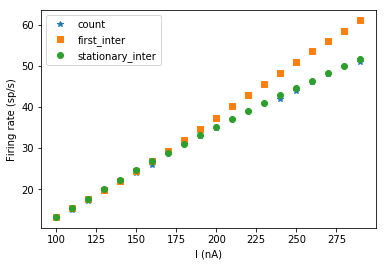

In [78]:
v_rest= -60*b2.mV #EL
v_reset= -50*b2.mV #Vreset
conductance_L = 10*b2.nsiemens #GL
membrane_capacitance = 100*b2.pF #CM
firing_threshold = -40* b2.mV #Vth
deltaVth = 2*b2.mV

a = 0.03/(b2.ms)
b = -2*(b2.pA/b2.mV)
k = 0.7*b2.pA/(b2.mV**2)
d = 100*b2.pA 

tau_w = 200*b2.ms
v_max = 35*b2.mV

simulation_time = 5
#current = 200.01 * b2.pamp
input_current = np.arange(100, 300, 10)
# differential equation of Leaky Integrate-and-Fire model
eqs = """
dv/dt = ((k/membrane_capacitance)*(((v - v_rest)*(v - firing_threshold)))
        - (u/membrane_capacitance)
        + (input_current/membrane_capacitance))  : volt
du/dt = (a)*(b*(v - v_rest) - u) : amp
input_current : amp
"""
neuron = b2.NeuronGroup(len(input_current), model=eqs, reset="v=v_reset; u=u+d", threshold="v>v_max", method="euler")
neuron.v = v_rest
neuron.u = 0*b2.pA
neuron.input_current = input_current*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v","u"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.second)

#plot
# input_current = [None]*len(current)
# for i in range(len(current)):
#     input_current[i] = input_factory.get_step_current(t_start=0, t_end=simulation_time, unit_time=b2.second,
#     amplitude= current[i]*b2.nA) 
#     plot_tools.plot_voltage_and_current_traces(
#     state_monitor, input_current[i], title="min input", firing_threshold=firing_threshold)

plt.figure(2)
print("nr of spikes: {}".format(spike_monitor.count))
print("spikes times: {}".format(spike_monitor.t[:]))

print("spikes train: {}".format(spike_monitor.spike_trains()[0][0]))

first_inter = [None]*len(input_current)
stationary_inter = [None]*len(input_current)
for i in range(len(input_current)):
    first_inter[i] = 1/(float(spike_monitor.spike_trains()[i][2]) - float(spike_monitor.spike_trains()[i][1]))
    stationary_inter[i] = 1/(float(spike_monitor.spike_trains()[i][-2]) - float(spike_monitor.spike_trains()[i][-3]))
    
print(first_inter)
print(stationary_inter)
plt.plot(neuron.input_current/b2.pA, spike_monitor.count/simulation_time, '*', label='count')
plt.plot(neuron.input_current/b2.pA, first_inter/b2.second, 's', label='first_inter')
plt.plot(neuron.input_current/b2.pA, stationary_inter/b2.second, 'o', label='stationary_inter')
plt.xlabel('I (nA)')
plt.ylabel('Firing rate (sp/s)')
plt.legend()
plt.show()#%%
